# Welcome to the Perceptron demo page
# Most of the inspiration comes from the book Grokking Machine Learning from Manning. A really good book to get into Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
import turicreate as tc

In [2]:
data = pd.DataFrame({
    "sentence": ["tjilp tjilp tjilp","mwah mwah", "tjilp mwah tjilp", "tjilp mwah mwah", "mwah mwah mwah tjilp", "tjilp mwah tjilp mwah tjilp"],
    "tjilp":[3,0,2,1,1,3],
    "mwah": [0,2,1,2,3,2],
    "mood": ["Happy", "Sad", "Happy", "Sad", "Sad", "Happy"]
    })

In [3]:
data

,sentence,tjilp,mwah,mood
0,tjilp tjilp tjilp,3,0,Happy
1,mwah mwah,0,2,Sad
2,tjilp mwah tjilp,2,1,Happy
3,tjilp mwah mwah,1,2,Sad
4,mwah mwah mwah tjilp,1,3,Sad
5,tjilp mwah tjilp mwah tjilp,3,2,Happy


In [4]:
def plot_sentiment(happy_data, sad_data, line = []):
    tick_spacing = 1
    fig, ax = plt.subplots(1,1)

    ax.scatter(happy_data["tjilp"], happy_data["mwah"], c='g',marker='o', label='Happy')
    ax.scatter(sad_data["tjilp"], sad_data["mwah"], c='r',marker='x', label='Sad')
    if line and len(line) > 1:
        ax.plot(line[0],line[1])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.title('Happy or Sad sentence')
    plt.ylabel('Mwah')
    plt.xlabel('Tjilp')
    plt.rcParams["figure.figsize"] = (8,6)
    plt.legend()
    plt.grid()
    plt.show()

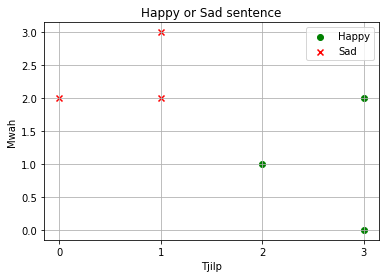

In [5]:
happy_sentence = data[data["mood"] == "Happy"]
sad_sentence = data[data["mood"] == "Sad"]
plot_sentiment(happy_sentence, sad_sentence)

In [6]:
data = pd.DataFrame({
    "sentence": ["tjilp","mwah mwah", "tjilp mwah tjilp", "tjilp mwah mwah", "mwah mwah mwah tjilp", "tjilp mwah tjilp mwah", "mwah mwah tjilp tjilp tjilp", "mwah mwah mwah tjilp tjilp"],
    "tjilp":[1,0,2,1,1,2,3,2],
    "mwah": [0,2,1,2,3,2,2,3],
    "mood": ["Sad", "Sad", "Sad", "Sad", "Happy", "Happy", "Happy", "Happy"]
    })

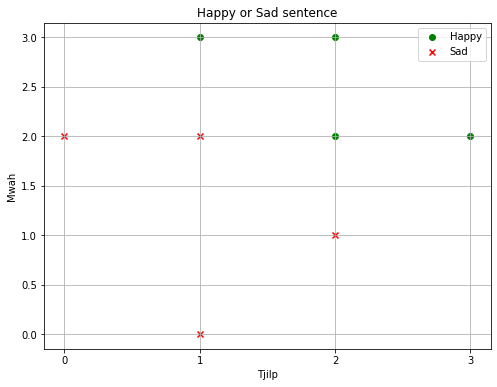

In [7]:
happy_sentence = data[data["mood"] == "Happy"]
sad_sentence = data[data["mood"] == "Sad"]
plot_sentiment(happy_sentence, sad_sentence)

In [8]:
data = pd.DataFrame({
    "tjilp":[1,0,2,1,1,2,3,2,4,2,3,4,4,3],
    "mwah": [0,2,1,2,3,2,2,3,4,4,1,2,0,3],
    "mood": ["Sad", "Sad", "Sad", "Sad", "Happy", "Happy", "Sad", "Happy", "Happy", "Happy", "Sad", "Happy", "Happy","Sad"]
    })

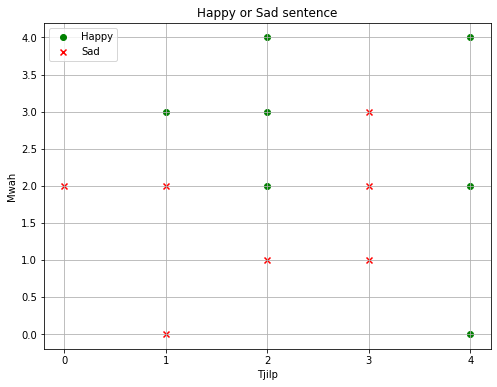

In [9]:
happy_sentence = data[data["mood"] == "Happy"]
sad_sentence = data[data["mood"] == "Sad"]
plot_sentiment(happy_sentence, sad_sentence)

In [10]:
data["label"]=data["mood"].apply(lambda x: 1 if x == "Happy" else 0)

In [11]:
data

,tjilp,mwah,mood,label
0,1,0,Sad,0
1,0,2,Sad,0
2,2,1,Sad,0
3,1,2,Sad,0
4,1,3,Happy,1
5,2,2,Happy,1
6,3,2,Sad,0
7,2,3,Happy,1
8,4,4,Happy,1
9,2,4,Happy,1


In [12]:
features = data[["tjilp","mwah"]].to_numpy()
labels = data["label"].to_numpy()

In [17]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0
    
def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if (pred == label):
        return 0
    else:
        return np.abs(score(weights, bias, features))
    
def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i]) # do you understand why we take i for some parameters?
    return total_error / len(features)

def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label - pred)*features[i]*learning_rate
    bias += (label - pred) * learning_rate
    return weights, bias

def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features) - 1) # Pick a random point in our dataset
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    return weights, bias, errors

In [19]:
found_weights, found_bias, found_errors = perceptron_algorithm(features, labels)

We need the line formula, which is w1 * x1 + w2 * x2 + bias = 0, dus x2 = (-w1 * x1-bias)/w2

In [20]:
def calculate_x2 (x1, weights, bias):
    return (-1*weights[0] * x1 - bias)/weights[1]

x_2_4 = calculate_x2(4,found_weights, found_bias)
x_2_0 = calculate_x2(0, found_weights, found_bias)

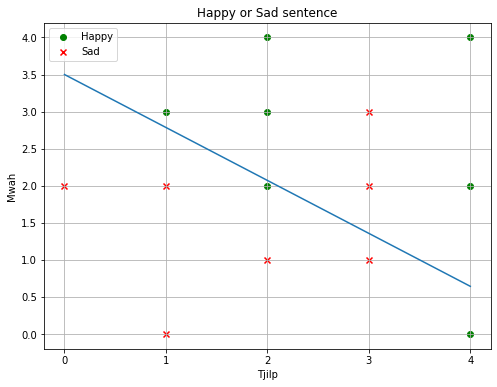

In [21]:
plot_sentiment(happy_sentence, sad_sentence, [[0, 4],[x_2_0, x_2_4]])

In [22]:
prediction(found_weights, found_bias, np.array([1,3]))

1

In [23]:
datadict = {'tjilp': features[:,0], 'mwah':features[:,1], 'prediction': labels}
datatc = tc.SFrame(datadict)

In [25]:
perceptron = tc.logistic_classifier.create(datatc, target='prediction')

Logistic regression:

--------------------------------------------------------

Number of examples          : 14

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.000462     | 0.642857          |

| 2         | 3        | 0.003006     | 0.642857          |

| 3         | 4        | 0.007685     | 0.642857          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [26]:
perceptron.coefficients

name,index,class,value,stderr
(intercept),None,1,-3.4393448660855945,2.1617791681914915
mwah,None,1,0.8583548521396857,0.6016521323138562
tjilp,None,1,0.7325844438149645,0.5825268669260164


In [27]:
new_sentence = tc.SFrame({'tjilp':[3], 'mwah':[3]})
perceptron.predict(new_sentence)

dtype: int
Rows: 1
[1]

In [28]:
perceptron.coefficients[1]['value']

0.8583548521396857

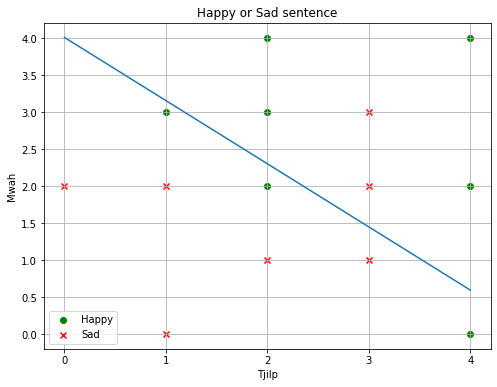

In [29]:
tc_weights = np.array([perceptron.coefficients[2]['value'],perceptron.coefficients[1]['value']])
tc_bias = perceptron.coefficients[0]['value']
tc_x_2_4 = calculate_x2(4, tc_weights, tc_bias)
tc_x_2_0 = calculate_x2(0, tc_weights, tc_bias)
plot_sentiment(happy_sentence, sad_sentence, [[0, 4],[tc_x_2_0, tc_x_2_4]])